In [1]:
%pip install sklearn-pandas
!pip install scikit-plot

# for data
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

# for processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# for the model
from sklearn.ensemble import RandomForestClassifier

# for classification report
from sklearn import metrics

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [ ]:
df2 = pd.read_csv("out/cleaned_data.csv")

print(df2.shape)
df2.head()

In [ ]:
# label encoding and mapping

y = df2['target_material_group_text'].unique()

le = LabelEncoder()
values = le.fit_transform(y)

zip_iterator = zip(y, values)
a_dictionary = dict(zip_iterator)

print(pd.DataFrame(a_dictionary.items(), columns=
                   ["Target material groups", "Target material groups encoded"]).to_string(index = False))

df2['target_material_group_code'] = df2['target_material_group_text']
df2['target_material_group_code'] = df2['target_material_group_code'].map(a_dictionary)

df2.head(5)

In [4]:
df3 = df2.dropna()
df3.shape

(405117, 11)

In [5]:
# definying and transforming the data
before_vect = df3[["company_code","english_wostopw","plant"]]

columnTransformer = ColumnTransformer(
    [("E" ,OneHotEncoder(dtype="int"),["company_code","plant"]),
     ("tfidf",TfidfVectorizer(),"english_wostopw")],
    remainder="drop")

vector_transformer = columnTransformer.fit(before_vect)
vectorized_df = vector_transformer.transform(before_vect)

# setting "target_material_group_text_code" as class variable
y = df3["target_material_group_code"]

# splitting the data between train and test
x, x_test, y, y_test = train_test_split(vectorized_df,y,test_size=0.2,train_size=0.8, random_state = 42)

In [6]:
clf_noweight = RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1, class_weight=None)
clf_balanced = RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1, class_weight="balanced")
clf_balancedsubs = RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1, class_weight="balanced_subsample")

training_noweight = clf_noweight.fit(x, y)
training_balanced = clf_balanced.fit(x, y)
training_balancedsubs = clf_balancedsubs.fit(x, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 22.0min finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.1s finished


                                       precision    recall  f1-score   support

            Entertainment electronics       0.70      0.78      0.74        82
    Hardware communication technology       0.95      0.99      0.97      6314
                    Mass storage (IT)       0.75      0.75      0.75         4
                     Media technology       0.79      0.92      0.85       432
      Network components (components)       0.88      0.94      0.91       863
Notebook PC and other non-standard PC       0.79      0.96      0.86       119
                     Office equipment       0.86      0.93      0.89      2849
                         Office stamp       0.96      0.99      0.98       620
                      Office supplies       0.99      0.97      0.98     33436
                    Peripheral device       0.88      0.91      0.89      2578
                    Personal computer       0.99      0.97      0.98      8525
    Photo technology video technology       0.69   

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished


                                       precision    recall  f1-score   support

            Entertainment electronics       0.73      0.75      0.74        89
    Hardware communication technology       0.95      0.99      0.97      6322
                    Mass storage (IT)       0.75      0.75      0.75         4
                     Media technology       0.78      0.92      0.85       426
      Network components (components)       0.87      0.95      0.91       852
Notebook PC and other non-standard PC       0.80      0.94      0.87       123
                     Office equipment       0.86      0.92      0.89      2890
                         Office stamp       0.96      0.98      0.97       625
                      Office supplies       0.99      0.97      0.98     33391
                    Peripheral device       0.87      0.90      0.89      2585
                    Personal computer       0.98      0.97      0.98      8469
    Photo technology video technology       0.73   

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished


                                       precision    recall  f1-score   support

            Entertainment electronics       0.73      0.74      0.74        90
    Hardware communication technology       0.95      0.99      0.97      6311
                    Mass storage (IT)       0.75      0.75      0.75         4
                     Media technology       0.78      0.91      0.84       433
      Network components (components)       0.87      0.95      0.91       854
Notebook PC and other non-standard PC       0.79      0.95      0.86       121
                     Office equipment       0.86      0.92      0.89      2900
                         Office stamp       0.96      0.98      0.97       625
                      Office supplies       0.99      0.97      0.98     33386
                    Peripheral device       0.87      0.90      0.88      2574
                    Personal computer       0.98      0.97      0.98      8481
    Photo technology video technology       0.73   

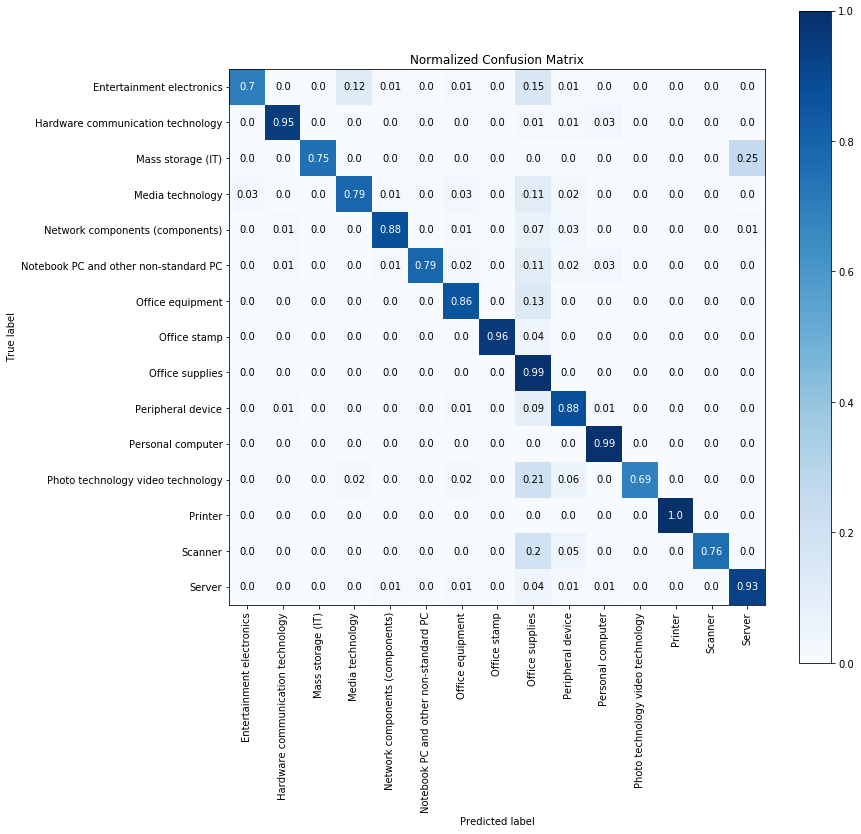

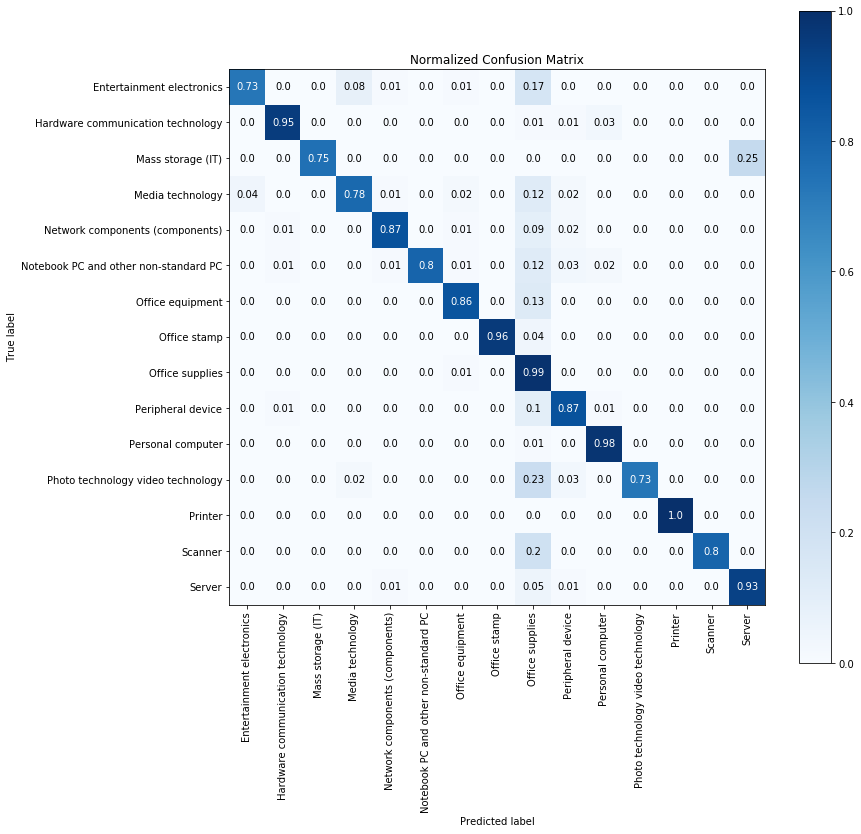

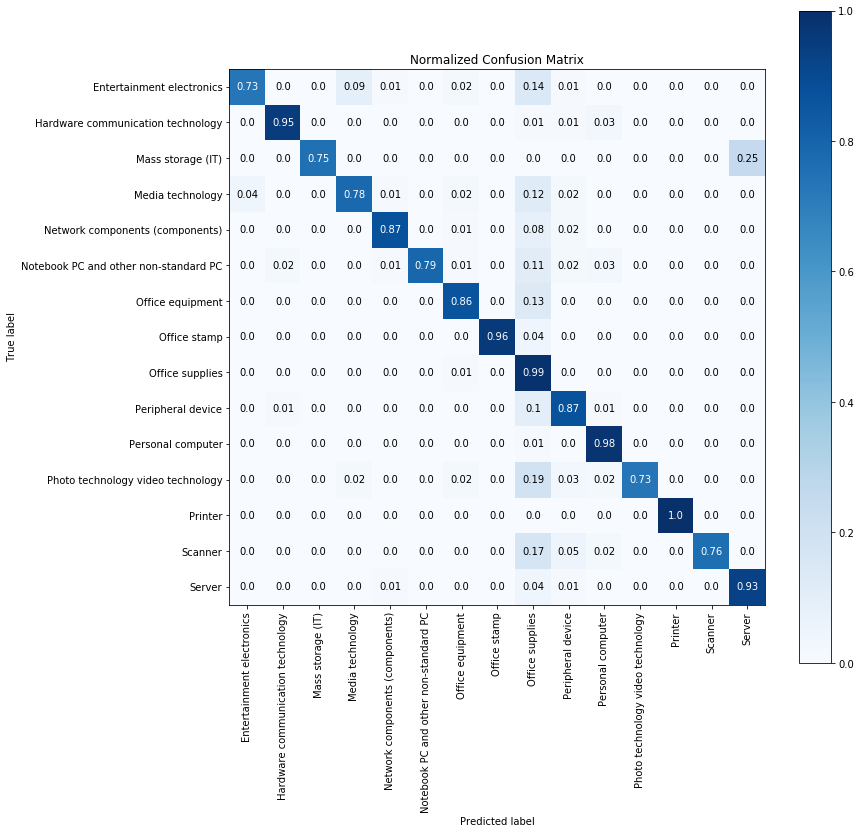

In [8]:
# Apply the models on the test set, plot confusion matrices and print classification reports

# precision: correctly-identified class members/ number of times of prediction (for the class)
# recall: correctly-identified class members/ total class members
# weighted average of the precision and recall,

predicted_noweight = clf_noweight.predict(x_test)

y_test_decoded = le.inverse_transform(y_test)
predicted_decoded = le.inverse_transform(predicted_noweight)

skplt.metrics.plot_confusion_matrix(
    y_test_decoded, 
    predicted_decoded,
    normalize=True,
    figsize=(12,12),x_tick_rotation=90)

print(metrics.classification_report(predicted_decoded, y_test_decoded))


predicted_balanced = clf_balanced.predict(x_test)

y_test_decoded = le.inverse_transform(y_test)
predicted_decoded = le.inverse_transform(predicted_balanced)

skplt.metrics.plot_confusion_matrix(
    y_test_decoded, 
    predicted_decoded,
    normalize=True,
    figsize=(12,12),x_tick_rotation=90)

print(metrics.classification_report(predicted_decoded, y_test_decoded))


predicted_balancedsubs = clf_balancedsubs.predict(x_test)

y_test_decoded = le.inverse_transform(y_test)
predicted_decoded = le.inverse_transform(predicted_balancedsubs)

skplt.metrics.plot_confusion_matrix(
    y_test_decoded, 
    predicted_decoded,
    normalize=True,
    figsize=(12,12),x_tick_rotation=90)

print(metrics.classification_report(predicted_decoded, y_test_decoded))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.6s finished


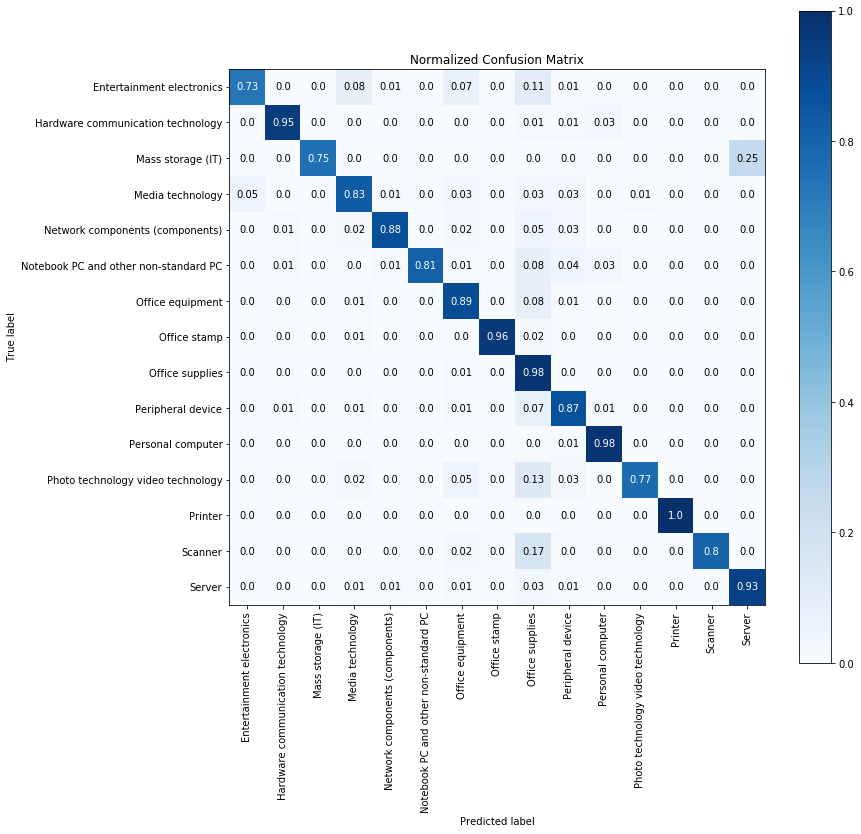

In [16]:
predicted = clf.predict(x_test)

y_test_decoded = le.inverse_transform(y_test)
predicted_decoded = le.inverse_transform(predicted)

skplt.metrics.plot_confusion_matrix(
    y_test_decoded, 
    predicted_decoded,
    normalize=True,
    figsize=(12,12),x_tick_rotation=90)